In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

<IPython.core.display.Javascript object>


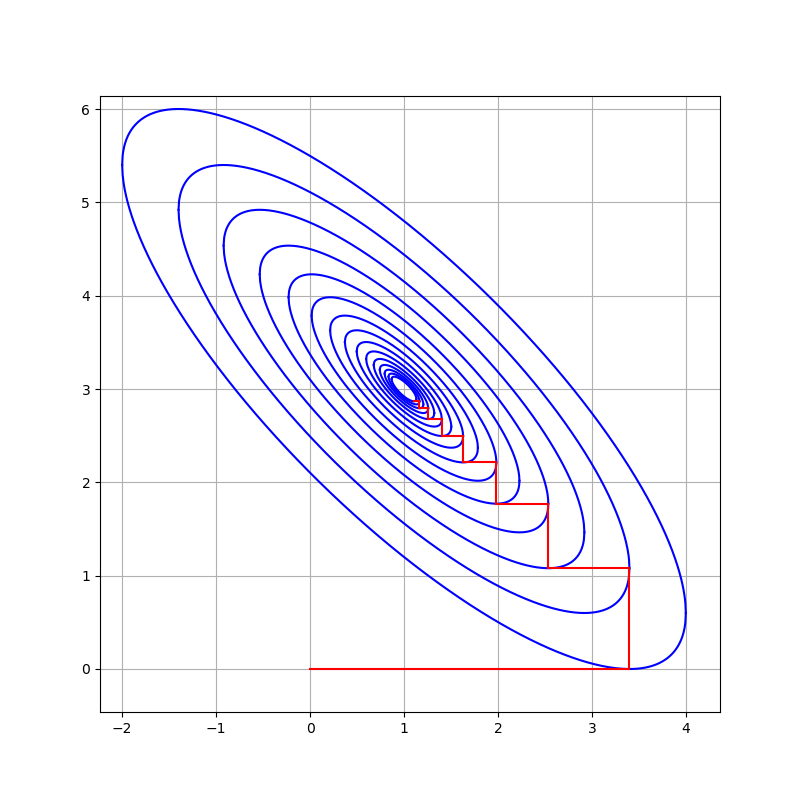

i 1 :
dx = 3.400
x = 3.400 , y = 0 , value = 16.20
dy = 1.080
x = 3.400 , y = 1.080 , value = 10.37
i 2 :
dx = -0.8640
x = 2.536 , y = 1.080 , value = 6.635
dy = 0.6912
x = 2.536 , y = 1.771 , value = 4.247
i 3 :
dx = -0.5530
x = 1.983 , y = 1.771 , value = 2.718
dy = 0.4424
x = 1.983 , y = 2.214 , value = 1.739
i 4 :
dx = -0.3539
x = 1.629 , y = 2.214 , value = 1.113
dy = 0.2831
x = 1.629 , y = 2.497 , value = 0.7125
i 5 :
dx = -0.2265
x = 1.403 , y = 2.497 , value = 0.4560
dy = 0.1812
x = 1.403 , y = 2.678 , value = 0.2918
i 6 :
dx = -0.1450
x = 1.258 , y = 2.678 , value = 0.1868
dy = 0.1160
x = 1.258 , y = 2.794 , value = 0.1195
i 7 :
dx = -0.09277
x = 1.165 , y = 2.794 , value = 0.07650
dy = 0.07422
x = 1.165 , y = 2.868 , value = 0.04896
i 8 :
dx = -0.05937
x = 1.106 , y = 2.868 , value = 0.03134
dy = 0.04750
x = 1.106 , y = 2.868 , value = 0.03134
Done


In [25]:
plt.figure(figsize = (8,8))
x, y, dx, dy, a, b = symbols('x y dx dy a b')
f = (x+2*y-7)**2+(2*x+y-5)**2 # Исходная функция
fdx = (x+dx+2*y-7)**2+(2*(x+dx)+y-5)**2 # Функция с приращением по x
f_dx = fdx.diff(dx) # Производная по приращению x
fdy = (x+2*(y+dy)-7)**2+(2*x+y+dy-5)**2 # Функция с приращением по y
f_dy = fdy.diff(dy) # Производная по приращению y
e = 0.05 # Точность
f_value = lambdify([x, y], f) # Для подсчёта значений заданных функций
f_dx_value = lambdify([x, y], f_dx)
f_dy_value = lambdify([x, y], f_dy)
x = 0 # Начальные координаты
y = 0
old_x = x # "старые" координаты (для отображения линий спуска)
old_y = y
v = f_value(x, y) # значение функции в x, y
i = 1 # Номер итерации

def plot(old_x, old_y, x, y, v):
    b1 = solve(Eq((a+2*b-7)**2+(2*a+b-5)**2, v), b)[0] # Выражение функции f через y, -sqrt
    b2 = solve(Eq((a+2*b-7)**2+(2*a+b-5)**2, v), b)[1] # ...+sqrt
    f1 = Lambda(a, b1) # Для подсчёта значений b1
    f2 = Lambda(a, b2) # ...b2
    s = solve(Eq(b1, b2), a) # Граничные значения x
    if (len(s) > 1):
        r = np.arange(s[0], s[1], 0.005) # Значения х от левого граничного до правого (не включая)
        r = np.append(r, s[1]) # Включение правой границы
        t1 = []
        t2 = []
        for i in range(len(r)):
            t1 = np.append(t1, f1(r[i])) # Значения y(x), -sqrt
            t2 = np.append(t2, f2(r[i])) # ...+sqrt
    else:
        r = s[0]
        t1 = f1(r)
        t2 = f2(r)
    plt.plot(r, t1, 'b') # Половина графика y(x), -sqrt
    plt.plot(r, t2, 'b') #...+sqrt
    plt.plot([old_x, x], [old_y, y], 'r') # Линия спуска
    
while(True):
    print("i", i, ":")
    dx_value = solve(Eq(f_dx_value(x, y), 0), dx)[0] # Минимизируем f_dx
    print("dx =", N(dx_value, 4))
    if (abs(dx_value) < e): # Проверка останова (если смещение по x меньше заданного)
        break
    x += dx_value
    v = f_value(x, y) # Новое значение f(x, y)
    plot(old_x, old_y, x, y, v) # Отрисовка графика
    print("x =", N(x, 4), ", y =", N(y, 4), ", value =", N(v, 4))
    old_x = x
    dy_value = solve(Eq(f_dy_value(x, y), 0), dy)[0] # Минимизируем f_dy
    print("dy =", N(dy_value, 4))
    if (abs(dy_value) < e):
        break
    y += dy_value
    v = f_value(x, y)
    plot(old_x, old_y, x, y, v)
    print("x =", N(x, 4), ", y =", N(y, 4), ", value =", N(v, 4))
    old_y = y
    i+=1
print("x =", N(x, 4), ", y =", N(y, 4), ", value =", N(v, 4))
print("Done")
plt.show()